In [25]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

In [26]:
diabetes = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/diabetes_clean.csv")

diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


CONFUSION MATRIX



A confusion matrix is a table used to evaluate the performance of a classification model.

It shows how well the model's predictions match the actual outcomes.

---------------------------------------------------------------------------------
Assessing a diabetes prediction classifier

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [27]:
#1. Import confusion_matrix and classification_report.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#2. Fit the model to the training data.
knn = KNeighborsClassifier(n_neighbors = 6)

In [28]:
X = diabetes[['bmi', 'age']].values
y = diabetes['diabetes'].values

In [29]:
#3. Spit Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)


In [30]:
#4. Fit the model to the training data
knn.fit(X_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
#5 Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [32]:
#6. Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))

[[116  35]
 [ 47  33]]


LOGISTIC REGRESSION

Logistic regression is a technique used to predict the probability of a bianary outcome

-----------------------------------------------------------------------------------------------------------------------------
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

In [33]:
#1. Import LogisticRegression.
from sklearn.linear_model import LogisticRegression

#2. Instantiate a logistic regression model, logreg.
logreg = LogisticRegression()

#3. Fit the model to the training data.
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [34]:
#4. Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[:10])

[0.5070309  0.2621656  0.16851245 0.17314983 0.48962511 0.75732791
 0.06118489 0.5155887  0.3488152  0.77754421]


THE "ROC" CURVE

---------------------------------------------------------------------------------------------------------------------------------

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

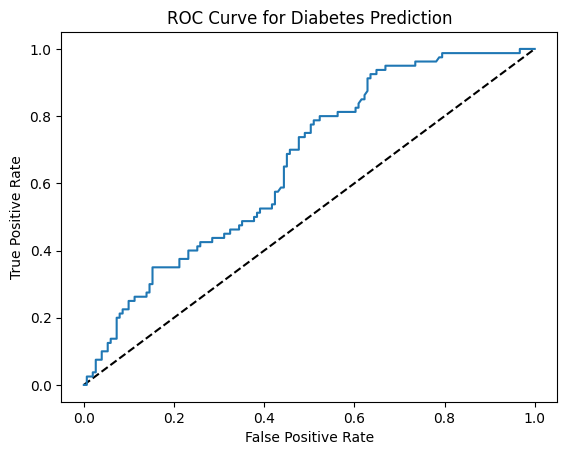

In [35]:
#1. Import roc_curve.
from sklearn.metrics import roc_curve

#2. Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

#3. Plot true positive rate against false positive rate.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

ROC AUC
------------------------------------------------------------------------------------------------------------------------

After plotting the ROC curve, we now compute the area under the ROC curve, along with the other classification metrics we have used previously.

In [36]:
#1. Import roc_auc_score.
from sklearn.metrics import roc_auc_score


#2. Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
print(roc_auc_score(y_test, y_pred_probs))


0.6591059602649006


In [37]:
#3. Calculate and print the confusion matrix.
print(confusion_matrix(y_test,y_pred))

[[122  29]
 [ 52  28]]


In [38]:
#4. Call classification_report().
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       151
           1       0.49      0.35      0.41        80

    accuracy                           0.65       231
   macro avg       0.60      0.58      0.58       231
weighted avg       0.63      0.65      0.63       231



HYPERPARAMETER TUNING WITH GRIDSEARCHCV

Hyperparameters are parameters we specifically call before fitting a model e.g n_neighbors

Choosing the correct hyperparameter value is a fundamental step in building a successful model

-----------------------------------------------------------------------------------------------------------------

You are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

In [41]:
#1. Import GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score ,KFold

#2. Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
param_grid = {'alpha': np.linspace(0.00001,1,20)}

#3. Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
lasso = Lasso()
kf = KFold(n_splits=6, shuffle=True, random_state=42)
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

#4. Fit the grid search object to the training data to perform a cross-validated grid search.
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
Tuned lasso score: 0.17779575448026744
